In [ ]:
#pip install folium

In [1]:
import pandas as pd
import sqlite3
from pprint import pprint

import folium

In [2]:
#create a sqlite file
db_name = "us_food_desert.sqlite"

conn = sqlite3.connect(db_name)
cursor = conn.cursor()

In [3]:
#read our cleaned data csv 
df = pd.read_csv("FoodAccessResearchDataCleanCSV_Updated.csv")

In [4]:
df.to_sql("food_deserts", conn, if_exists="replace", index=False)

3101

In [5]:
#query to make sure we imported and created it properly
query = "SELECT * FROM food_deserts LIMIT 5;"
result = pd.read_sql(query, conn)
print(result)

     State          County             County_State  latitude  longitude  \
0  Alabama  Autauga County  Autauga County, Alabama   32.4597   -86.4573   
1  Alabama  Baldwin County  Baldwin County, Alabama   30.6263   -87.8816   
2  Alabama  Barbour County  Barbour County, Alabama   31.9102   -85.1505   
3  Alabama     Bibb County     Bibb County, Alabama   32.9421   -87.1753   
4  Alabama   Blount County   Blount County, Alabama   33.9394   -86.4932   

   TotalPopulation  LowAccess_1MUrban_10MRural  LowAccess_HalfUrban_10MRural  \
0            54571                        9252                       14721.0   
1           182265                       22895                       35823.0   
2            27457                        2817                        4281.0   
3            22915                         183                         183.0   
4            57322                        1951                        2716.0   

   LowAccess_HalfUrban_10MRural.1  LowAccess_LowInc_1MUrban_10

In [6]:
#query to make sure we imported and created it properly
query = "SELECT TotalPopulation FROM food_deserts WHERE County = 'Autauga County' AND State = 'Alabama';"

result = pd.read_sql(query, conn)
print(result)



   TotalPopulation
0            54571


In [7]:
#query to make sure we imported and created it properly
query =  "SELECT County, State, TotalPopulation FROM food_deserts ORDER BY TotalPopulation DESC LIMIT 5;"

result = pd.read_sql(query, conn)
print(result)

               County       State  TotalPopulation
0  Los Angeles County  California          9818605
1         Cook County    Illinois          5194675
2       Harris County       Texas          4092459
3     Maricopa County     Arizona          3817117
4    San Diego County  California          3095313


In [8]:
#query to Get counties with the highest number of people with low food access
query =  "SELECT County, State, LowAccess_1MUrban_10MRural FROM food_deserts ORDER BY LowAccess_1MUrban_10MRural DESC LIMIT 10;"

result = pd.read_sql(query, conn)
print(result)

                  County       State  LowAccess_1MUrban_10MRural
0        Maricopa County     Arizona                      397474
1          Harris County       Texas                      387058
2     Los Angeles County  California                      320670
3         Tarrant County       Texas                      271868
4       Riverside County  California                      268027
5  San Bernardino County  California                      250902
6           Bexar County       Texas                      243326
7       San Diego County  California                      231023
8          Dallas County       Texas                      219728
9         Suffolk County    New York                      212857


In [9]:
#DNU query to Get the percentage of the population receiving SNAP benefits for each county  DNU
query =  "SELECT County, State, (LowAccess_1MUrban_10MRural * 100.0 / TotalPopulation) AS LowAccess_Percentage FROM food_deserts ORDER BY LowAccess_Percentage DESC LIMIT 10;"

result = pd.read_sql(query, conn)
print(result)

                County         State  LowAccess_Percentage
0     McPherson County      Nebraska             50.092764
1        Borden County         Texas             50.078003
2        Thomas County      Nebraska             50.077280
3         Hayes County      Nebraska             50.051706
4      Sterling County         Texas             50.043745
5       Prairie County       Montana             50.042409
6       Briscoe County         Texas             50.030544
7  Throckmorton County         Texas             50.030469
8       Jerauld County  South Dakota             50.024143
9        Kidder County  North Dakota             50.020534


In [10]:
#query to make sure we imported and created it properly
query =  "SELECT TotalPopulationWhite, TotalPopulationBlack, TotalPopulationAsian, TotalPopulationNHPI, TotalPopulationNAAN, TotalPopulationOther, TotalPopulationHispanicLatam FROM food_deserts WHERE County = 'Baldwin County' AND State = 'Alabama';"

result = pd.read_sql(query, conn)
print(result)

   TotalPopulationWhite  TotalPopulationBlack  TotalPopulationAsian  \
0                156153                 17105                  1348   

   TotalPopulationNHPI  TotalPopulationNAAN  TotalPopulationOther  \
0                   89                  379                   757   

   TotalPopulationHispanicLatam  
0                          2650  


In [11]:
#query to make sure we imported and created it properly
query =  "SELECT County, State, latitude, longitude, ((latitude - 32.7767)*(latitude - 32.7767) + (longitude - (-96.7970))*(longitude - (-96.7970))) AS Distance_Squared FROM food_deserts ORDER BY Distance_Squared ASC  LIMIT 10;"

result = pd.read_sql(query, conn)
print(result)

            County  State  latitude  longitude  Distance_Squared
0    Dallas County  Texas   32.7935   -96.7667          0.001200
1    Collin County  Texas   33.0502   -96.7486          0.077145
2   Kaufman County  Texas   32.7440   -96.4529          0.119474
3     Ellis County  Texas   32.4035   -96.8446          0.141544
4  Rockwall County  Texas   32.9169   -96.4374          0.148968
5   Tarrant County  Texas   32.7817   -97.3474          0.302965
6    Denton County  Texas   33.2175   -97.1418          0.313192
7   Johnson County  Texas   32.5170   -97.3344          0.356243
8      Hunt County  Texas   33.1116   -96.1099          0.584264
9   Navarro County  Texas   32.0824   -96.4665          0.591283


In [12]:
#query to show Top 10 Counties in a Given State with the Least Food Access Issues
query =  "SELECT County, State, LowAccess_1MUrban_10MRural, (LowAccess_1MUrban_10MRural * 100.0 / TotalPopulation) AS LowAccess_Percentage FROM food_deserts WHERE State = 'Texas'  -- Change to your desired state  ORDER BY LowAccess_Percentage ASC  LIMIT 10;"

result = pd.read_sql(query, conn)
print(result)

              County  State  LowAccess_1MUrban_10MRural  LowAccess_Percentage
0    Anderson County  Texas                       12795             21.887509
1     Andrews County  Texas                        1981             13.397809
2    Angelina County  Texas                       11276             12.995125
3     Aransas County  Texas                        3668             15.839019
4      Archer County  Texas                         827              9.134084
..               ...    ...                         ...                   ...
249      Wood County  Texas                        4567             10.883138
250    Yoakum County  Texas                        1015             12.882345
251     Young County  Texas                        2795             15.067385
252    Zapata County  Texas                        1176              8.389214
253    Zavala County  Texas                        1845             15.800291

[254 rows x 4 columns]


In [13]:
#query to Identify Counties with High Food Access Issues in Rural Areas
#query =  "SELECT County, State, LowAccess_HalfUrban_10MRural, TotalPopulation,  (LowAccess_HalfUrban_10MRural * 100.0 / TotalPopulation) AS Rural_LowAccess_Percentage FROM food_deserts WHERE LowAccess_HalfUrban_10MRural > 5000  -- Change threshold as needed  ORDER BY Rural_LowAccess_Percentage DESC  LIMIT 10;"

query = """
SELECT 
    County, 
    State, 
    TotalPopulation, 
    LowAccess_1MUrban_10MRural,
    latitude,
    longitude,
    (LowAccess_1MUrban_10MRural * 100.0 / TotalPopulation) AS LowAccess_Percentage 
FROM food_deserts 
WHERE State IN (
    'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 
    'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'
) 
ORDER BY LowAccess_Percentage DESC 
LIMIT 10;
"""

result = pd.read_sql(query, conn)
print(result)

              County          State  TotalPopulation  \
0      Putnam County       New York            99710   
1    Hamilton County       New York             4836   
2  Barnstable County  Massachusetts           215888   
3   Hampshire County  Massachusetts           158080   
4     Chester County   Pennsylvania           498886   
5       Ocean County     New Jersey           576567   
6  Rockingham County  New Hampshire           295223   
7      Sussex County     New Jersey           149265   
8    Plymouth County  Massachusetts           494919   
9  Gloucester County     New Jersey           288288   

   LowAccess_1MUrban_10MRural  latitude  longitude  LowAccess_Percentage  
0                       26702   41.3688   -73.7414             26.779661  
1                        1290   43.5944   -74.3822             26.674938  
2                       55099   41.6692   -70.2005             25.522030  
3                       36744   42.3266   -72.6745             23.243927  
4       

In [14]:
#query to Identify Top 10 Counties in the Northeast with High Food Insecurity


# Read the query results into a pandas DataFrame
df = pd.read_sql(query, conn)

# Check if DataFrame is not empty; otherwise, set default coordinates
if not df.empty:
    avg_lat = df['latitude'].mean()
    avg_lon = df['longitude'].mean()
else:
    # Default center coordinates (e.g., roughly central to the Northeast)
    avg_lat = 42.0  
    avg_lon = -75.0  # Default longitude coordinate for the Northeastavg_lon = -75.0 coordinates
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=7)
# Create a Folium map centered on the average coordinates
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=7)

# Loop over the DataFrame rows and add a circle marker for each county
for idx, row in df.iterrows():
    # You may adjust the scaling factor (here, 0.5) to change the bubble sizes.
    bubble_radius = row['LowAccess_Percentage'] * 0.5  
    popup_text = (
        f"<strong>{row['County']}, {row['State']}</strong><br>"
        f"Low Access Percentage: {row['LowAccess_Percentage']:.2f}%<br>"
        f"Total Population: {row['TotalPopulation']}"
    )
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=bubble_radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=200)
    ).add_to(m)
# Save the map to an HTML file (optional)
m.save("northeast_food_insecurity_map.html")

# Display the map (in a Jupyter Notebook this will render the interactive map)
m


# query =  "SELECT County, State, TotalPopulation, LowAccess_1MUrban_10MRural, (LowAccess_1MUrban_10MRural * 100.0 / TotalPopulation) AS LowAccess_Percentage FROM food_deserts WHERE State IN ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania') ORDER BY LowAccess_Percentage DESC  LIMIT 10;"

# result = pd.read_sql(query, conn)
# print(result)

In [15]:
print(df.columns)

Index(['County', 'State', 'TotalPopulation', 'LowAccess_1MUrban_10MRural',
       'latitude', 'longitude', 'LowAccess_Percentage'],
      dtype='object')


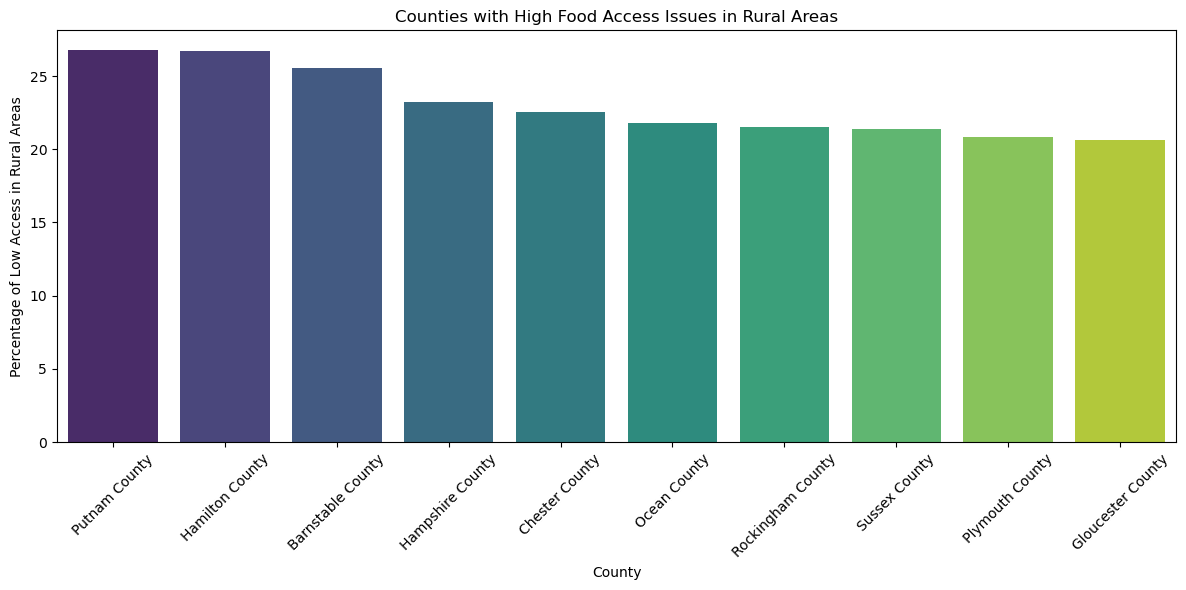

In [16]:
#Rural_LowAccess_Percentage for the top counties:

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'result' DataFrame contains your query results
plt.figure(figsize=(12, 6))
#sns.barplot(data=result, x='County', y='LowAccess_Percentage', palette='viridis')
sns.barplot(data=result, x='County', y='LowAccess_Percentage', hue='County', palette='viridis', legend=False)
plt.title('Counties with High Food Access Issues in Rural Areas')
plt.xlabel('County')
plt.ylabel('Percentage of Low Access in Rural Areas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
print(result.head())

              County          State  TotalPopulation  \
0      Putnam County       New York            99710   
1    Hamilton County       New York             4836   
2  Barnstable County  Massachusetts           215888   
3   Hampshire County  Massachusetts           158080   
4     Chester County   Pennsylvania           498886   

   LowAccess_1MUrban_10MRural  latitude  longitude  LowAccess_Percentage  
0                       26702   41.3688   -73.7414             26.779661  
1                        1290   43.5944   -74.3822             26.674938  
2                       55099   41.6692   -70.2005             25.522030  
3                       36744   42.3266   -72.6745             23.243927  
4                      112443   39.9601   -75.6058             22.538816  
